# Illustration of overfitting with XGBoost and Random Forest

In [85]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

## XGBoost classifier

In [53]:
df_titanic = pd.read_csv('titanic.csv', sep=';')

In [64]:
# Specific preprocessing for XGBoost
df_titanic["Sex"] = df_titanic["Sex"].astype("category")
df_titanic["Pclass"] = df_titanic["Pclass"].astype("category")
X = df_titanic[["Age", "Fare", "Pclass", "Sex"]]
Y = df_titanic['Survived']

In [46]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.30, random_state=34)

In [47]:
model = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, max_depth=10)

In [48]:
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
Y_val_pred = model.predict(X_val)
np.mean(Y_val_pred == Y_val)

0.8395522388059702

In [50]:
Y_train_pred = model.predict(X_train)
np.mean(Y_train_pred == Y_train)

0.9839486356340289

In [76]:
accuracies_train = []
accuracies_val = []
params_grid = list(range(1, 15))

for param_value in tqdm(params_grid):
    model = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, max_depth=param_value, random_state=323)
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    accuracies_train.append(np.mean(Y_train_pred == Y_train))
    accuracies_val.append(np.mean(Y_val_pred == Y_val))

  0%|          | 0/14 [00:00<?, ?it/s]

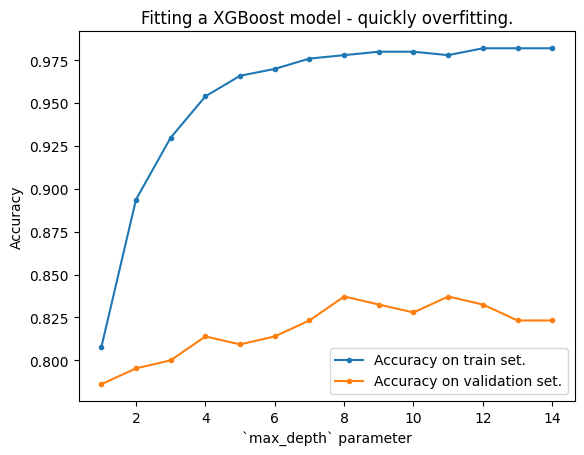

In [77]:
plt.plot(params_grid, accuracies_train, marker=".", label="Accuracy on train set.")
plt.plot(params_grid, accuracies_val, marker=".", label="Accuracy on validation set.");
plt.title('Fitting a XGBoost model - quickly overfitting.')
plt.xlabel('`max_depth` parameter')
plt.ylabel('Accuracy')
plt.legend();

## Random Forest classifier

In [78]:
df_titanic = pd.read_csv('titanic.csv', sep=';')

In [79]:
# Specific preprocessing for Random Forest
df_titanic.dropna(subset=["Age", "Fare", "Pclass", "Sex"], inplace=True)
df_titanic["Male"] = (df_titanic["Sex"] == "male") * 1
df_titanic["Female"] = (df_titanic["Sex"] == "female") * 1
X = df_titanic[["Age", "Fare", "Pclass", "Male", "Female"]]
Y = df_titanic['Survived']

In [80]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.30, random_state=34)

In [91]:
accuracies_train = []
accuracies_val = []
params_grid = list(range(1, 30))

for param_value in tqdm(params_grid):
    model = RandomForestClassifier(max_depth=param_value, random_state=98)
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    accuracies_train.append(np.mean(Y_train_pred == Y_train))
    accuracies_val.append(np.mean(Y_val_pred == Y_val))

  0%|          | 0/29 [00:00<?, ?it/s]

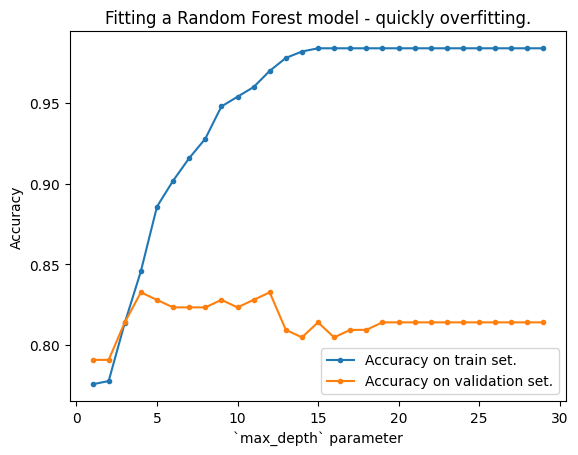

In [92]:
plt.plot(params_grid, accuracies_train, marker=".", label="Accuracy on train set.")
plt.plot(params_grid, accuracies_val, marker=".", label="Accuracy on validation set.");
plt.title('Fitting a Random Forest model - quickly overfitting.')
plt.xlabel('`max_depth` parameter')
plt.ylabel('Accuracy')
plt.legend();

In [94]:
accuracies_train = []
accuracies_val = []
params_grid = list(range(1, 150))

for param_value in tqdm(params_grid):
    model = RandomForestClassifier(max_depth=12, n_estimators=param_value, random_state=98)
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    accuracies_train.append(np.mean(Y_train_pred == Y_train))
    accuracies_val.append(np.mean(Y_val_pred == Y_val))

  0%|          | 0/149 [00:00<?, ?it/s]

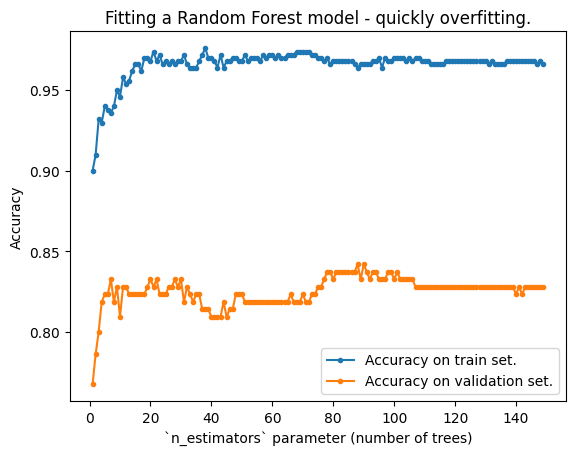

In [95]:
plt.plot(params_grid, accuracies_train, marker=".", label="Accuracy on train set.")
plt.plot(params_grid, accuracies_val, marker=".", label="Accuracy on validation set.");
plt.title('Fitting a Random Forest model - quickly overfitting.')
plt.xlabel('`n_estimators` parameter (number of trees)')
plt.ylabel('Accuracy')
plt.legend();

## Bonus: plot the trees

In [109]:
model = RandomForestClassifier(max_depth=12, n_estimators=15, random_state=98)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=15, random_state=98)

Plot the first tree of the Random Forest model.

One can replace 0 with 1, 2, 3, etc. (up to 14, since there are 12 trees).

One can see that most of the Gini coefficients (can be viewed as "error") of the leaves are 0, but not all. Indeed, it is possible that the `max_depth` or `min_sample_split` made the algorithm stop the tree, before reaching the value 0 for the Gini coefficient.

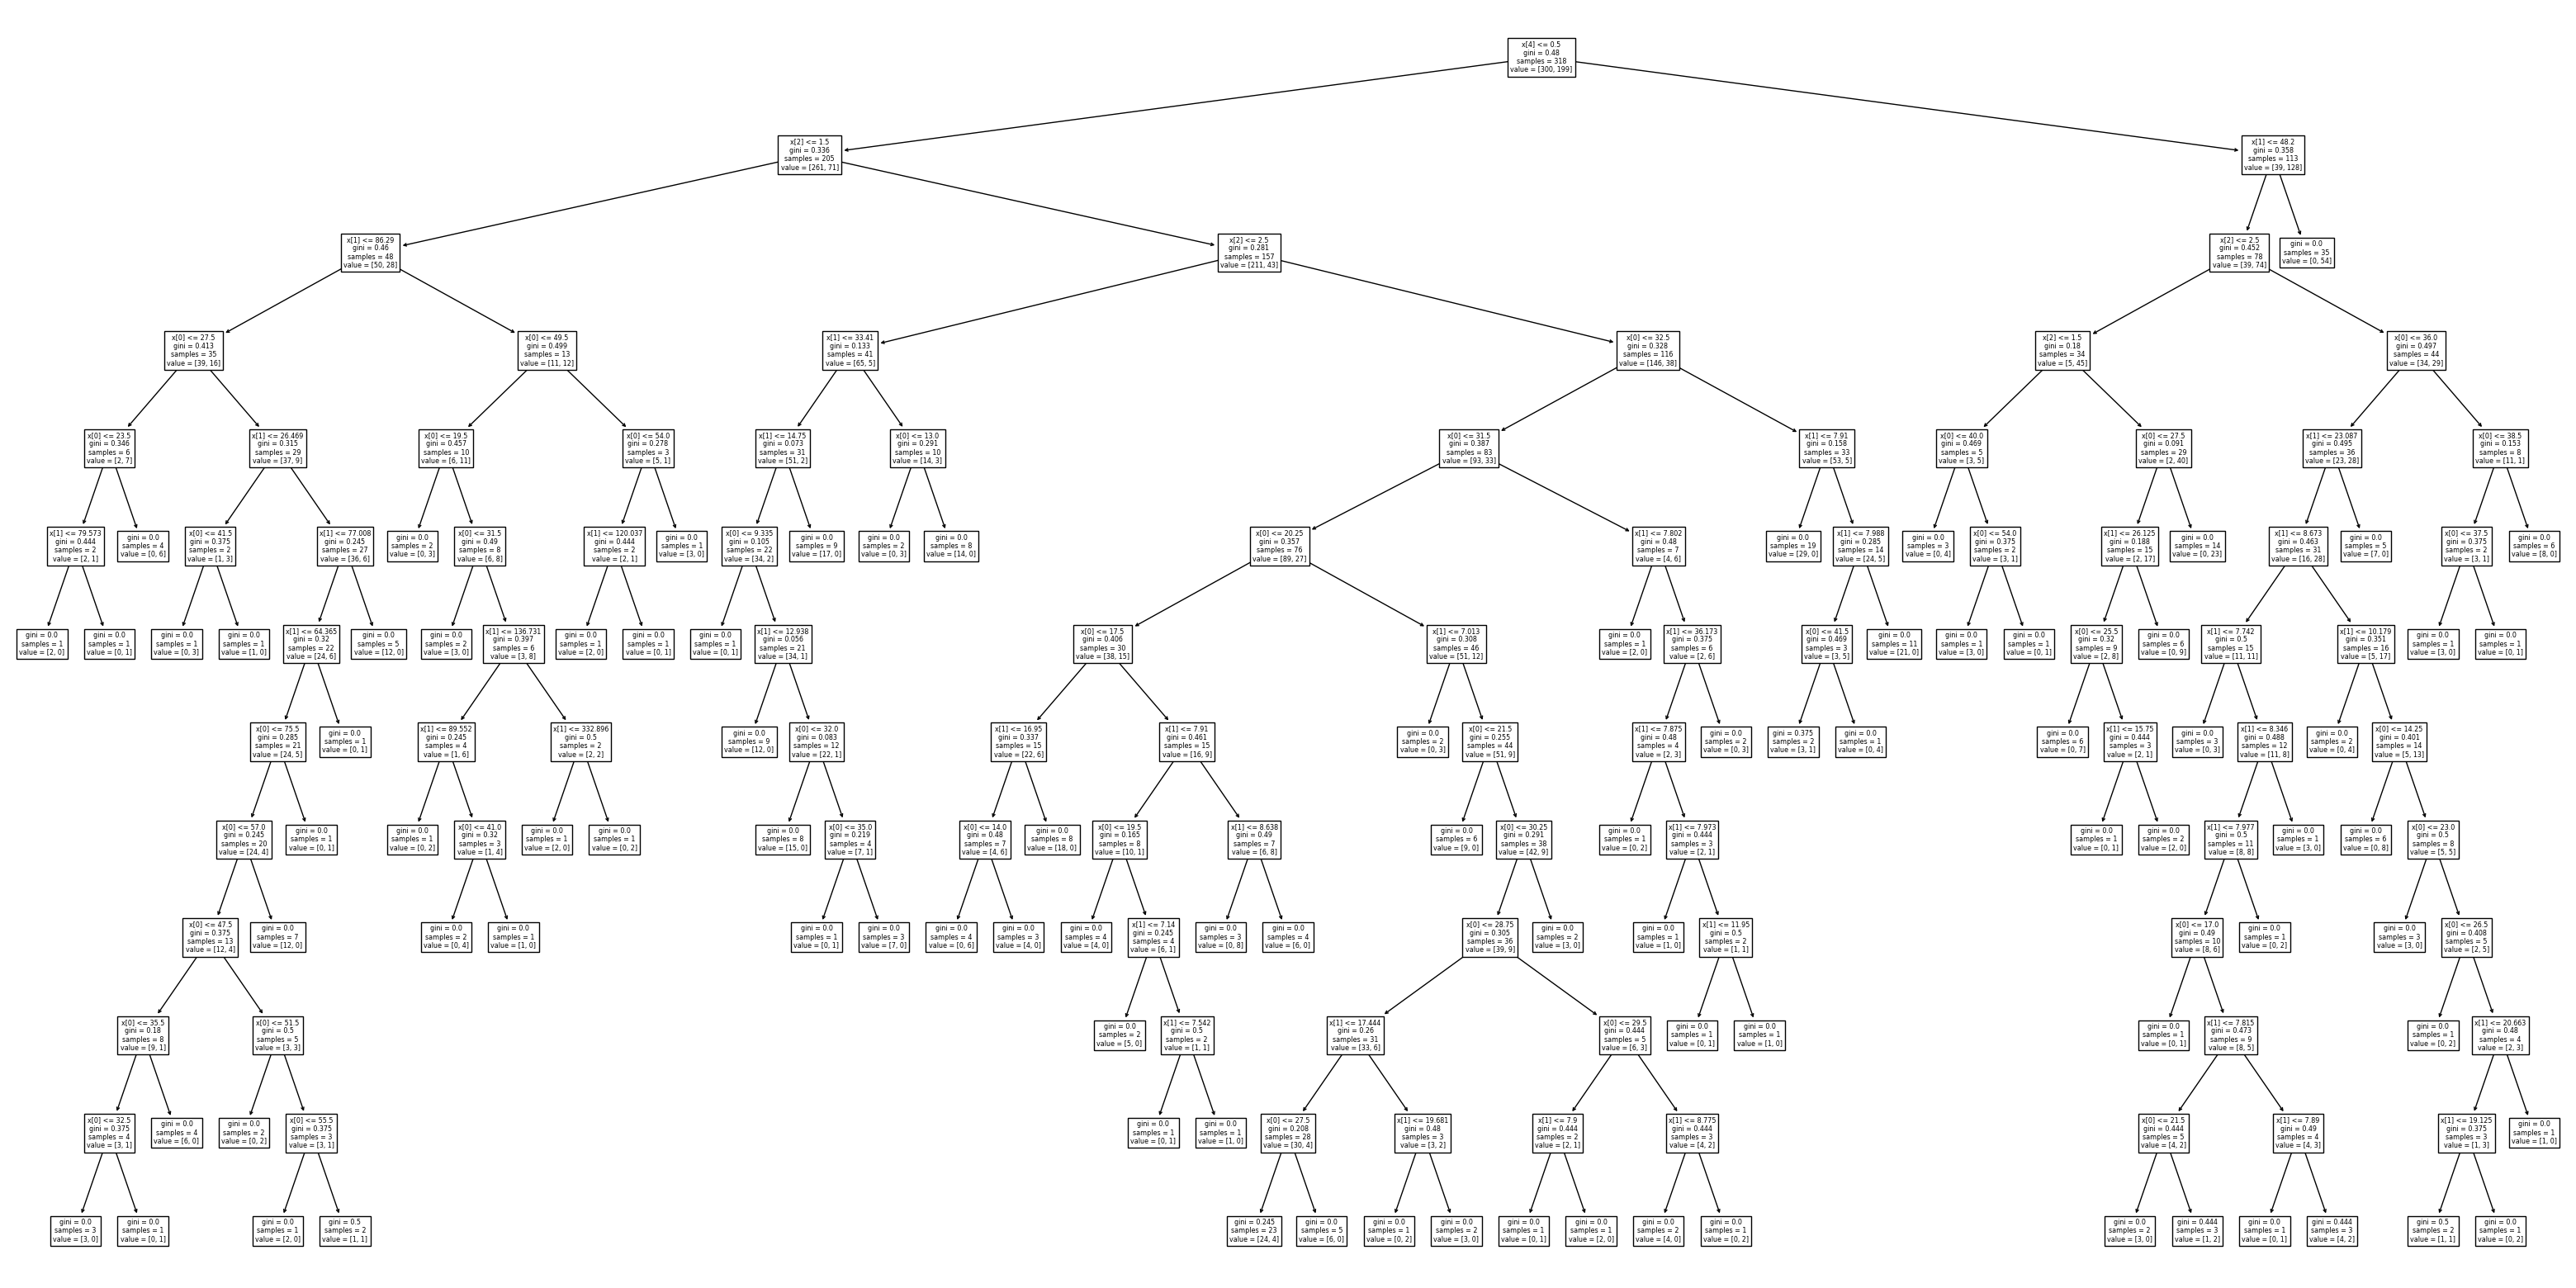

In [110]:
plt.figure(figsize=(40, 20))
plot_tree(model.estimators_[0]);